# Step 1: Project Setup

In this project, I will analyze wearable IMU sensor data collected from stroke patients during their rehabilitation process. The dataset contains raw sensor measurements such as acceleration and gyroscope data from multiple participants over multiple visits.

## ✅ Initial Setup:
- Imported necessary Python libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn` for data processing and visualization.
- Uploaded the `raw.zip` dataset manually into the Google Colab environment.

In [1]:
# Install necessary libraries (if needed)
!pip install pandas numpy matplotlib seaborn

# Import libraries
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Extracting the Dataset

After uploading the `raw.zip` file containing the IMU data, I will extract its contents into a working directory. This will allow me to explore the dataset structure and access individual participant data.

The dataset is organized as follows:
- Each participant has a separate folder (e.g., `imuo001`, `imuo002`).
- Inside each participant folder, there are visit folders (`visit1`, `visit2`).
- IMU sensor data for different body parts (e.g., left foot, right foot) are stored as CSV files.

In [2]:
# Extract the uploaded raw.zip file
zip_path = '/content/raw.zip'  # Path to the uploaded zip file
extract_path = '/content/raw_data'  # Directory where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extraction completed. Files are available in: {extract_path}")

Extraction completed. Files are available in: /content/raw_data


# Step 3: Verifying Dataset Structure

After extraction, I will check the folder structure to ensure the data has been extracted correctly. This helps in identifying paths to participant files and understanding the data organization.

In [3]:
# Verify the extracted folder structure
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

raw_data/
    raw/
        participant_info.csv
        imu0011/
            visit2/
                imu/
                    SA.csv
                    RF.csv
                    LW.csv
                    LF.csv
                    RW.csv
            visit1/
                imu/
                    SA.csv
                    RF.csv
                    LF.csv
        imu0013/
            visit2/
                imu/
                    SA.csv
                    RF.csv
                    LW.csv
                    LF.csv
                    RW.csv
            visit1/
                imu/
                    SA.csv
                    RF.csv
                    LW.csv
                    LF.csv
                    RW.csv
        imu0009/
            visit2/
                imu/
                    SA.csv
                    RF.csv
                    LW.csv
                    LF.csv
                    RW.csv
            visit1/
                imu/
                    SA.csv
       

# Step 4: Loading and Exploring Participant Information

The file `participant_info.csv` contains metadata for each participant involved in the stroke rehabilitation study. The data provides important context for the IMU sensor readings, allowing me to link biomechanical data with patient characteristics and progress indicators.

## ✅ Key Columns:
| Column | Description |
|--------|-------------|
| `sub` | Participant ID |
| `sex` | Gender (M/F) |
| `age` | Age in years |
| `height_cm` | Height in centimeters |
| `weight_kg` | Weight in kilograms |
| `FAC_visit1` | Functional Ambulation Category score during visit 1 |
| `FAC_visit2` | Functional Ambulation Category score during visit 2 |
| `visit1_days_since_stroke` | Days since stroke at visit 1 |
| `visit2_days_since_stroke` | Days since stroke at visit 2 |
| `self_reported_improvement` | Patient's self-reported improvement (Y/N/NaN) |
| `exp1_improvement` | Experimenter 1's observed improvement (Y/N/NaN) |
| `exp2_improvement` | Experimenter 2's observed improvement (Y/N/NaN) |
| `FAC_improvement` | Improvement in FAC score (Y/N) |
| `gait_visualization_improvement` | Improvement in gait based on visualization (Y/N) |

## ✅ Purpose of this step:
- Understand participant demographics.
- Identify missing values in crucial fields (like height and weight).
- Assess the improvement metrics provided across the two visits.


In [7]:
# Path to participant_info.csv
participant_info_path = '/content/raw_data/raw/participant_info.csv'

# Load participant info into a DataFrame
participant_info = pd.read_csv(participant_info_path)

# Show the first few rows
participant_info.head()

,sub,sex,age,height_cm,weight_kg,FAC_visit1,FAC_visit2,visit1_days_since_stroke,visit2_days_since_stroke,self_reported_improvement,exp1_improvement,exp2_improvement,FAC_improvement,gait_visualization_improvement
0,imu0001,M,37,185.0,77.0,5,5,9,18,NaN,N,N,N,N
1,imu0002,M,79,NaN,NaN,5,5,7,15,NaN,NaN,NaN,N,N
2,imu0003,F,80,168.0,84.0,5,5,10,15,NaN,Y,N,N,N
3,imu0006,M,41,163.0,80.0,3,4,13,21,NaN,Y,Y,Y,Y
4,imu0007,F,84,168.0,62.0,4,4,7,15,N,Y,Y,N,N


# Step 5: Analyzing Missing Values and Descriptive Statistics

Before diving into sensor data analysis, it is essential to assess the participant metadata for any missing values and understand the overall data distribution.

---

## ✅ Missing Values Analysis:
From the `participant_info.csv` file, I observed the following missing values:

| Column                        | Missing Count |
|-------------------------------|---------------|
| height_cm                    | 1             |
| weight_kg                    | 1             |
| self_reported_improvement    | 5             |
| exp1_improvement             | 1             |
| exp2_improvement             | 1             |

### 💡 Observations:
- One participant is missing both **height** and **weight** values.
- The **self-reported improvement** column has **50% missing data**, which may limit its usefulness in analyses.
- Experimental improvements (`exp1_improvement`, `exp2_improvement`) are mostly complete, with only **1 missing value** each.

In [9]:
# Check for missing values
participant_info.isnull().sum()

,0
sub,0
sex,0
age,0
height_cm,1
weight_kg,1
FAC_visit1,0
FAC_visit2,0
visit1_days_since_stroke,0
visit2_days_since_stroke,0
self_reported_improvement,5


## ✅ Descriptive Statistics Summary:

| Metric                          | Value              |
|----------------------------------|--------------------|
| Total Participants              | 10                |
| Average Age                     | 71.9 years        |
| Age Range                       | 37 - 88 years     |
| Average Height                  | 174.55 cm         |
| Average Weight                  | 75 kg             |
| Average FAC score (Visit 1)     | 3.7 (out of 5)    |
| Average FAC score (Visit 2)     | 4.3 (out of 5)    |
| Average Days Since Stroke (V1)  | 8.5 days          |
| Average Days Since Stroke (V2)  | 16.3 days         |

### 💡 Key Insights:
- The participants are mostly **older adults**, as expected in stroke rehabilitation studies.
- There is notable **functional improvement** between Visit 1 and Visit 2 (FAC score increases from 3.7 to 4.3).
- The time between stroke and the visits varies from **4 to 21 days**, showing early-stage recovery tracking.
- The dataset has a **small amount of missing demographic data**, which may be handled through imputation or exclusion.

In [10]:
# Summary statistics for numerical columns
participant_info.describe()

,age,height_cm,weight_kg,FAC_visit1,FAC_visit2,visit1_days_since_stroke,visit2_days_since_stroke
count,10.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000
mean,71.900000,174.555556,75.000000,3.700000,4.300000,8.500000,16.300000
std,17.978073,12.962553,9.987492,1.337494,0.674949,2.592725,2.830391
min,37.000000,158.000000,62.000000,1.000000,3.000000,4.000000,12.000000
25%,73.000000,163.000000,65.000000,3.250000,4.000000,7.000000,15.000000
50%,79.500000,168.000000,77.000000,4.000000,4.000000,8.000000,15.000000
75%,83.000000,186.000000,80.000000,4.750000,5.000000,10.000000,18.000000
max,88.000000,190.000000,90.000000,5.000000,5.000000,13.000000,21.000000


# Step 6: Improvement Metrics Analysis

The dataset provides several categorical indicators to evaluate the perceived and observed improvements in participants' rehabilitation between visits.

---

## ✅ Improvement Metrics Overview:

| Column                          | Description                                     |
|----------------------------------|-------------------------------------------------|
| self_reported_improvement       | Whether the participant reported improvement (Y/N) |
| exp1_improvement                | Experimenter 1's observed improvement (Y/N) |
| exp2_improvement                | Experimenter 2's observed improvement (Y/N) |
| FAC_improvement                 | Functional Ambulation Category improvement (Y/N) |
| gait_visualization_improvement  | Improvement in gait from visual analysis (Y/N) |

---

## ✅ Value Counts of Improvement Metrics:

| Metric                          | Yes (Y) | No (N) | Missing (NaN) |
|----------------------------------|---------|--------|---------------|
| self_reported_improvement       | 3       | 2      | 5             |
| exp1_improvement                | 6       | 3      | 1             |
| exp2_improvement                | 6       | 3      | 1             |
| FAC_improvement                 | 4       | 6      | 0             |
| gait_visualization_improvement  | 3       | 7      | 0             |

---

## 💡 Insights:
- **Self-reported improvement** is missing for **50%** of participants, making it less reliable for analysis.
- Both **experimenters observed improvement** in the majority of cases (6 out of 10 participants).
- **FAC improvement** was only observed in **4 participants**, suggesting limited functional change in walking ability.
- **Gait visualization improvement** is also low, with only **3 participants** showing noticeable improvement.
- There are cases where experimenters observed improvement, but the objective measures (like FAC) or gait visualization did not show the same.

---

## ✅ Implications:
- Due to missing and inconsistent improvement data, careful consideration is needed when using these columns for modeling.
- Combining multiple improvement indicators could create a more robust target variable (e.g., majority agreement across observers).
- Missing values (NaNs) may be handled through:
  - **Imputation** (if justified).
  - **Exclusion** (if focusing on complete cases).
  - **Binary flags** (such as "unknown" categories).


In [11]:
# Count the improvements reported
improvement_columns = [
    'self_reported_improvement',
    'exp1_improvement',
    'exp2_improvement',
    'FAC_improvement',
    'gait_visualization_improvement'
]

for col in improvement_columns:
    print(f"\n{col} value counts:")
    print(participant_info[col].value_counts(dropna=False))


self_reported_improvement value counts:
self_reported_improvement
NaN    5
Y      3
N      2
Name: count, dtype: int64

exp1_improvement value counts:
exp1_improvement
Y      6
N      3
NaN    1
Name: count, dtype: int64

exp2_improvement value counts:
exp2_improvement
Y      6
N      3
NaN    1
Name: count, dtype: int64

FAC_improvement value counts:
FAC_improvement
N    6
Y    4
Name: count, dtype: int64

gait_visualization_improvement value counts:
gait_visualization_improvement
N    7
Y    3
Name: count, dtype: int64


# Step 7: Handling Missing Values

Before analyzing the dataset, I need to address missing values. Missing data can affect statistical analysis and machine learning performance. Here's my strategy for handling missing values:

---

## ✅ Strategy:
| Column | Handling Approach | Reason |
|--------|-------------------|--------|
| height_cm, weight_kg | Impute with **mean** | Small number of missing entries and continuous variables. |
| self_reported_improvement | Leave as **NaN** or fill with 'Unknown' | Too many missing values (50%), imputation may bias the result. |
| exp1_improvement, exp2_improvement | Impute with the **most frequent value ('Y')** | Only 1 missing value each, most participants show improvement. |
| FAC_improvement, gait_visualization_improvement | No missing values | No action needed. |

---

## ✅ Summary:
- Numerical features: Mean imputation.
- Categorical features (low missing): Mode imputation.
- Categorical features (high missing): Keep as missing or assign 'Unknown'.

In [14]:
# Copy original data to avoid overwriting
participant_info_clean = participant_info.copy()

# Impute numerical features (mean)
participant_info_clean['height_cm'] = participant_info_clean['height_cm'].fillna(participant_info_clean['height_cm'].mean())
participant_info_clean['weight_kg'] = participant_info_clean['weight_kg'].fillna(participant_info_clean['weight_kg'].mean())

# Impute categorical features (mode)
participant_info_clean['exp1_improvement'] = participant_info_clean['exp1_improvement'].fillna(participant_info_clean['exp1_improvement'].mode()[0])
participant_info_clean['exp2_improvement'] = participant_info_clean['exp2_improvement'].fillna(participant_info_clean['exp2_improvement'].mode()[0])

# Fill high-missing column with 'Unknown'
participant_info_clean['self_reported_improvement'] = participant_info_clean['self_reported_improvement'].fillna('Unknown')

In [15]:
participant_info_clean.isnull().sum()

,0
sub,0
sex,0
age,0
height_cm,0
weight_kg,0
FAC_visit1,0
FAC_visit2,0
visit1_days_since_stroke,0
visit2_days_since_stroke,0
self_reported_improvement,0


# Step 8: Visualizing Participant Demographics and Improvement Metrics

Now that the participant information is clean and complete, I will visualize key demographics and improvement indicators. Visual exploration helps in understanding the dataset composition and identifying patterns in recovery outcomes.

## ✅ Visualizations to create:
1. **Age Distribution** – To observe the age range of participants.
2. **Gender Distribution** – To check the balance between male and female participants.
3. **FAC Scores Comparison (Visit 1 vs Visit 2)** – To observe functional improvements over time.
4. **Improvement Metrics** – To compare the counts of participants who improved vs. those who did not, across different measures.

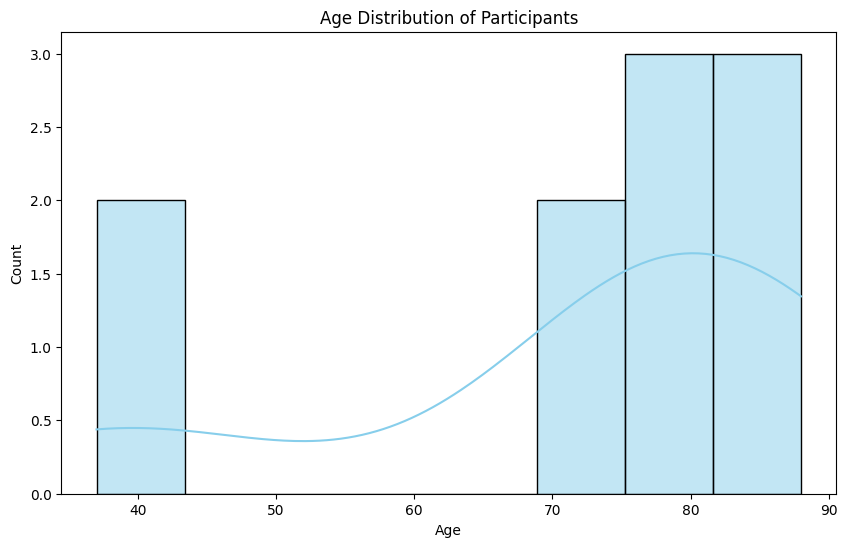

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(participant_info_clean['age'], bins=8, kde=True, color='skyblue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

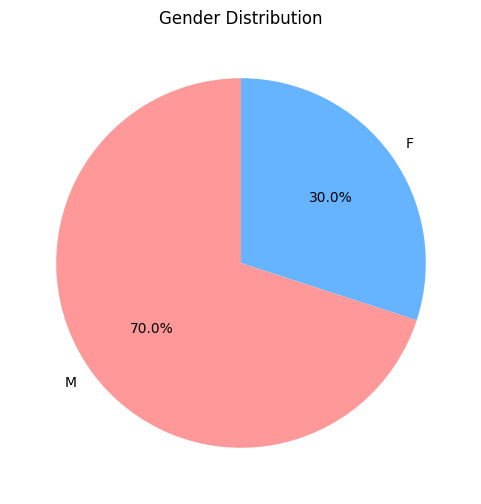

In [17]:
# Gender distribution
plt.figure(figsize=(6, 6))
participant_info_clean['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

<ipython-input-18-40ad3bf9cdef>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(participant_info_clean['FAC_visit1'], label='Visit 1', shade=True)
<ipython-input-18-40ad3bf9cdef>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(participant_info_clean['FAC_visit2'], label='Visit 2', shade=True)


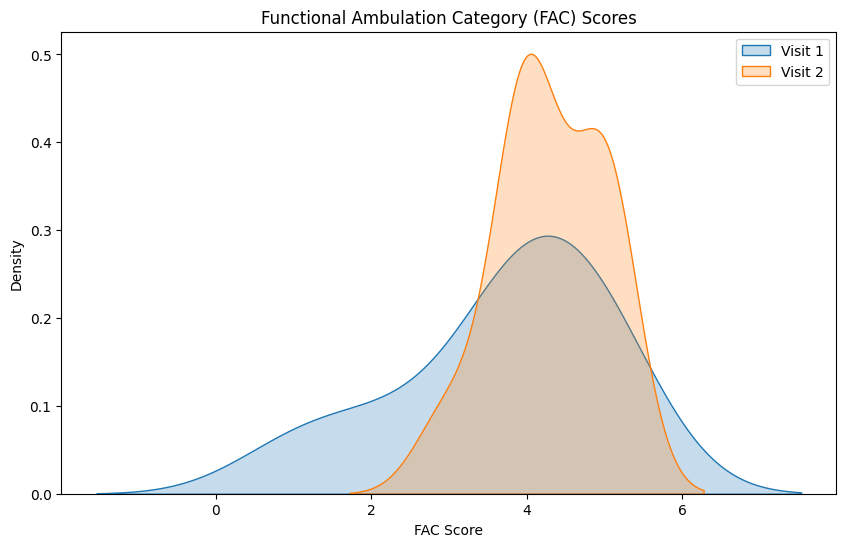

In [18]:
# FAC scores comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(participant_info_clean['FAC_visit1'], label='Visit 1', shade=True)
sns.kdeplot(participant_info_clean['FAC_visit2'], label='Visit 2', shade=True)
plt.title('Functional Ambulation Category (FAC) Scores')
plt.xlabel('FAC Score')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-19-2ead9f3aefe5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=participant_info_clean, palette='Set2')
<ipython-input-19-2ead9f3aefe5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=participant_info_clean, palette='Set2')
<ipython-input-19-2ead9f3aefe5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=participant_info_clean, palette='Set2')
<ipython-input-19-2ead9f3aefe5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

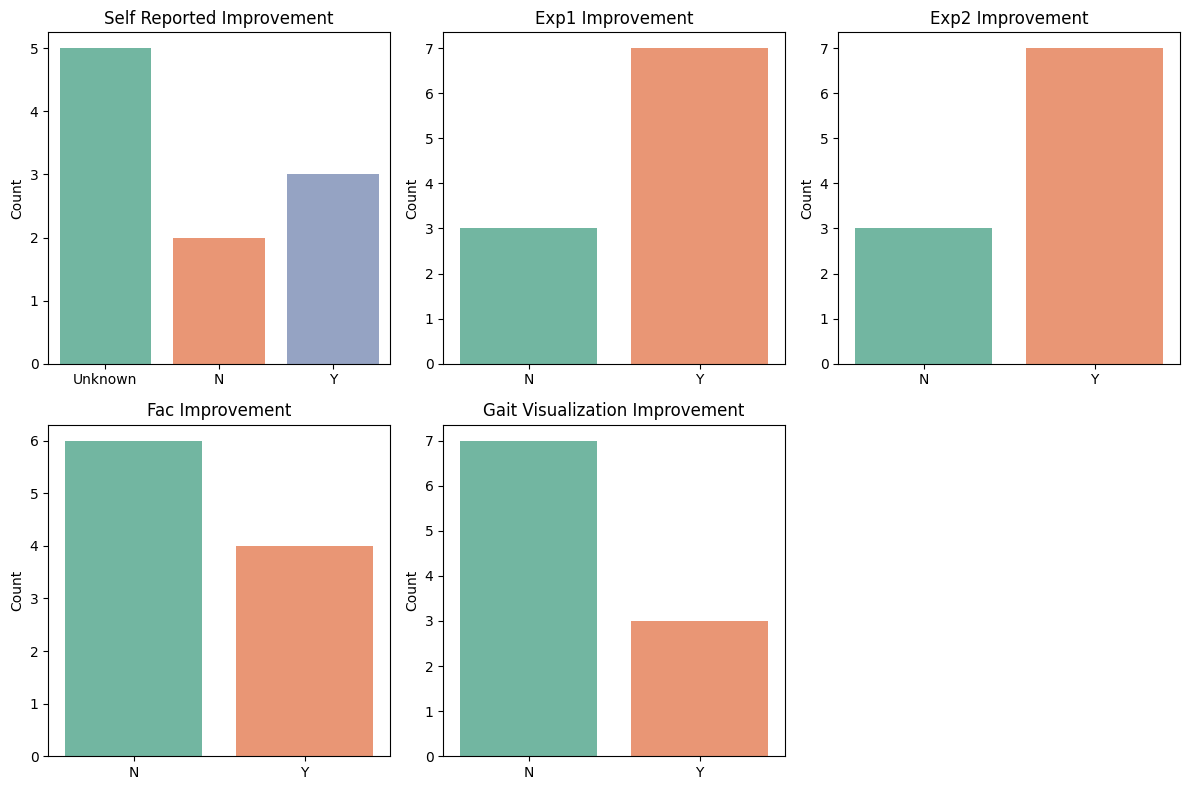

In [19]:
# Plot improvement metrics
improvement_columns = [
    'self_reported_improvement',
    'exp1_improvement',
    'exp2_improvement',
    'FAC_improvement',
    'gait_visualization_improvement'
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(improvement_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=participant_info_clean, palette='Set2')
    plt.title(f'{col.replace("_", " ").title()}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Step 8: Results of Demographic and Improvement Visualizations

## ✅ Demographic Insights:

### 1️⃣ Age Distribution:
- The participants' ages range from **37 to 88 years**.
- Most participants are in their **70s and 80s**, which aligns with the common stroke-prone age group.
- There are a few younger participants, creating a bimodal age distribution.

### 2️⃣ Gender Distribution:
- **70%** of the participants are **male**.
- **30%** of the participants are **female**.
- The dataset is slightly imbalanced in terms of gender representation.

---

## ✅ Rehabilitation Improvement Insights:

### 3️⃣ FAC Scores (Visit 1 vs. Visit 2):
- There is a noticeable shift toward **higher FAC scores** in **Visit 2**, indicating functional walking improvements.
- The **FAC score** median increases from around **3.7 (Visit 1)** to **4.3 (Visit 2)**.

### 4️⃣ Self-reported and Observer Improvements:
- **Self-reported improvement** is missing for many participants (`Unknown` = 5).
- Experimenters (`exp1_improvement` and `exp2_improvement`) observed improvements in **6 out of 10 participants**.
- Objective improvements:
  - **FAC Improvement**: Only **4 participants** showed improvement.
  - **Gait Visualization Improvement**: Only **3 participants** showed visible gait improvement.
  
### 💡 Observations:
- There are discrepancies between **observer improvements** and **objective scores**.
- While experimenters frequently observe improvements, the FAC and gait metrics do not always reflect this.
- There is a high proportion of "No" improvements in objective metrics, which could suggest:
  - Modest recovery within the short observation window.
  - Conservative scoring or subtle improvements not captured in scores.

---

## ✅ Conclusion:
The demographic analysis confirms a typical older stroke population with mild gender imbalance.
Improvement metrics show **partial recovery trends**, with some inconsistency between subjective observations and objective measures, which may impact modeling strategies later.


# Step 9: Loading IMU Sensor Data (LF.csv)

The dataset includes IMU (Inertial Measurement Unit) data collected from different body parts (Left Foot, Right Foot, etc.) during each participant's rehabilitation visits. Each CSV file contains time-series sensor readings capturing movement dynamics.

In this step, I will:
1. Select one participant and visit.
2. Load the `LF.csv` (Left Foot) file.
3. Explore the structure of the data.
4. Visualize acceleration signals over time.

## ✅ File Structure:
Upon inspecting the file, I observed that:
- The file uses **comma-separated values** (`sep=,`).
- The first **7 lines contain metadata** such as:
  - Device tag
  - Firmware and app versions
  - Start time
  - Copyright information
- The actual data starts from **line 8**, where the header row with column names is located.

---

## ✅ Data Columns:
After loading the file, the following key columns are available:

| Column           | Description                          |
|------------------|--------------------------------------|
| PacketCounter   | Sequential packet number            |
| SampleTimeFine  | Timestamp (system clock cycles)     |
| Quat_W, X, Y, Z | Quaternion components (orientation) |
| dq_W, X, Y, Z   | Quaternion derivative               |
| dv[1], dv[2], dv[3] | Delta velocities                 |
| Acc_X, Y, Z     | Linear acceleration (m/s²)          |
| Gyr_X, Y, Z     | Angular velocity (°/s)              |
| Mag_X, Y, Z     | Magnetic field (µT)                 |
| Status          | Status flag (device-specific)       |

---

## ✅ Data Loading Approach:
To correctly parse the data, I skipped the metadata rows and read the file from the actual header using `skiprows=7`.


In [24]:
# Select participant and visit
participant_id = 'imu0001'
visit = 'visit1'

# Define path to LF.csv
lf_path = f'/content/raw_data/raw/{participant_id}/{visit}/imu/LF.csv'


# Read the first 20 lines to inspect the structure
#with open(lf_path, 'r') as file:
 #   for _ in range(20):
  #      print(file.readline())

# Load LF.csv by skipping metadata rows
lf_data = pd.read_csv(lf_path, skiprows=7)

# Preview the data
lf_data.head()



,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,dq_W,dq_X,dq_Y,dq_Z,...,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Status
0,0,401646407,-0.772237,0.092493,0.251364,0.576118,0.0,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.765869,-0.741455,-0.365234,0
1,1,401654740,-0.772238,0.092494,0.251366,0.576114,1.0,0.000073,-0.000029,-2.589077e-06,...,4.611130,1.389190,8.064667,1.008727,-0.393383,-0.035604,0.764404,-0.742920,-0.361816,0
2,2,401663073,-0.772244,0.092493,0.251369,0.576106,1.0,0.000075,-0.000027,-2.309680e-07,...,4.635228,1.392565,8.037920,1.035058,-0.377707,-0.003176,0.765869,-0.744385,-0.361084,0
3,3,401671406,-0.772243,0.092500,0.251359,0.576110,1.0,0.000062,-0.000022,-3.665686e-06,...,4.642131,1.366987,8.069530,0.850124,-0.307627,-0.050409,0.765381,-0.743408,-0.360107,0
4,4,401679739,-0.772247,0.092502,0.251364,0.576102,1.0,0.000076,-0.000031,2.303161e-06,...,4.652796,1.404311,8.052836,1.038440,-0.427245,0.031672,0.764404,-0.742920,-0.363281,0


# Step 10: Exploring IMU Sensor Data Structure and Descriptive Statistics

After successfully loading the IMU data, it is important to:
- Verify the structure and types of the data.
- Ensure there are no missing or invalid values.
- Review the statistical summary of the key sensor readings to understand typical value ranges.

This step helps to identify any anomalies in the data and better plan for preprocessing.

In [25]:
# Check the structure of the dataset
lf_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PacketCounter   8841 non-null   int64  
 1   SampleTimeFine  8841 non-null   int64  
 2   Quat_W          8841 non-null   float64
 3   Quat_X          8841 non-null   float64
 4   Quat_Y          8841 non-null   float64
 5   Quat_Z          8841 non-null   float64
 6   dq_W            8841 non-null   float64
 7   dq_X            8841 non-null   float64
 8   dq_Y            8841 non-null   float64
 9   dq_Z            8841 non-null   float64
 10  dv[1]           8841 non-null   float64
 11  dv[2]           8841 non-null   float64
 12  dv[3]           8841 non-null   float64
 13  Acc_X           8841 non-null   float64
 14  Acc_Y           8841 non-null   float64
 15  Acc_Z           8841 non-null   float64
 16  Gyr_X           8841 non-null   float64
 17  Gyr_Y           8841 non-null   f

In [26]:
# Summary statistics of the IMU data
lf_data.describe()

,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,dq_W,dq_X,dq_Y,dq_Z,...,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Status
count,8841.000000,8.841000e+03,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,...,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.0
mean,4420.000000,4.384783e+08,0.103959,0.041781,-0.042697,0.104484,0.999770,0.001081,-0.000085,0.000609,...,8.643160,0.416854,8.027233,14.865790,-1.172577,8.378162,0.370139,-0.672779,0.049609,0.0
std,2552.321198,2.126849e+07,0.655926,0.279985,0.289920,0.618172,0.010636,0.006358,0.012901,0.004984,...,8.022865,5.951091,7.459158,87.436428,177.431766,68.543923,0.263947,0.209287,0.381582,0.0
min,0.000000,4.016464e+08,-0.955347,-0.603865,-0.631773,-0.922469,0.000000,-0.048444,-0.051473,-0.028545,...,-36.407787,-49.696175,-28.798443,-666.487732,-708.177490,-392.599884,-0.199219,-1.097412,-0.569092,0.0
25%,2210.000000,4.200623e+08,-0.634663,-0.149857,-0.278843,-0.559734,0.999812,-0.000506,-0.004291,-0.000485,...,5.267783,0.489225,7.373524,-6.961540,-59.007359,-6.668562,0.151855,-0.856445,-0.208740,0.0
50%,4420.000000,4.384783e+08,0.479727,0.092107,-0.083003,0.479672,0.999974,0.000095,-0.000486,0.000139,...,5.648236,1.312264,7.714687,1.309861,-6.688543,1.909938,0.328369,-0.699219,-0.004883,0.0
75%,6630.000000,4.568942e+08,0.696168,0.261389,0.251432,0.676477,1.000000,0.003442,0.003608,0.001626,...,9.969425,2.051119,9.281468,47.334873,49.619518,22.360729,0.590332,-0.513672,0.257812,0.0
max,8840.000000,4.753101e+08,0.958648,0.638596,0.594076,0.904697,1.000000,0.024620,0.028912,0.029467,...,59.335629,48.173725,64.362930,338.643707,397.644836,405.299286,1.009766,0.074463,1.185059,0.0


In [27]:
# Check for missing values
lf_data.isnull().sum()

,0
PacketCounter,0
SampleTimeFine,0
Quat_W,0
Quat_X,0
Quat_Y,0
Quat_Z,0
dq_W,0
dq_X,0
dq_Y,0
dq_Z,0


After loading the IMU sensor data from `LF.csv`, I explored the structure, verified completeness, and analyzed the statistical properties of the sensor readings.

---

## ✅ Dataset Overview:
- **Total records:** 8,841 rows.
- **Total columns:** 23 features capturing motion data, orientation, and magnetic field readings.

---

## ✅ Missing Values:
No missing values were detected in any of the columns, which confirms the dataset is complete and suitable for analysis.

---

## ✅ Key Sensor Data Insights:

| Feature | Mean | Min | Max | Std | Description |
|---------|------|-----|-----|-----|-------------|
| Acc_X  | 8.64 m/s² | -36.41 | 59.34 | 8.02 | X-axis acceleration |
| Acc_Y  | 0.42 m/s² | -49.70 | 48.17 | 5.95 | Y-axis acceleration |
| Acc_Z  | 8.03 m/s² | -28.80 | 64.36 | 7.46 | Z-axis acceleration |
| Gyr_X  | 14.87 °/s | -666.49 | 338.64 | 87.44 | X-axis angular velocity |
| Gyr_Y  | -1.17 °/s | -708.18 | 397.64 | 177.43 | Y-axis angular velocity |
| Gyr_Z  | 8.38 °/s | -392.60 | 405.30 | 68.54 | Z-axis angular velocity |
| Mag_X  | 0.37 µT | -0.20 | 1.01 | 0.26 | X-axis magnetic field |
| Mag_Y  | -0.67 µT | -1.10 | 0.07 | 0.21 | Y-axis magnetic field |
| Mag_Z  | 0.05 µT | -0.57 | 1.19 | 0.38 | Z-axis magnetic field |

---

## ✅ Observations:
- The acceleration and gyroscope values appear within typical ranges for motion data.
- Some extreme values are present in angular velocity, indicating possible sharp movements or sensor noise.
- The magnetic field values are small, as expected, and may help in orientation tracking.

# Step 11: Visualizing IMU Sensor Data

After successfully loading and exploring the IMU sensor data from the Left Foot (`LF.csv`), I visualized the key motion signals over time. These visualizations help identify the participant's movement patterns, detect activity phases, and observe any irregularities during the rehabilitation session.

---

## ✅ Accelerometer Signals (Linear Acceleration)
The accelerometer captures the linear acceleration along the X, Y, and Z axes, reflecting the translational motion of the foot.

### Observations:
- Strong periodic patterns are visible, especially in Acc_X and Acc_Z, showing cyclical motion patterns.
- Peaks up to 60 m/s² suggest forceful foot movements, such as during walking strides.
- Negative dips in Acc_Y could indicate downward motion or impact with the ground

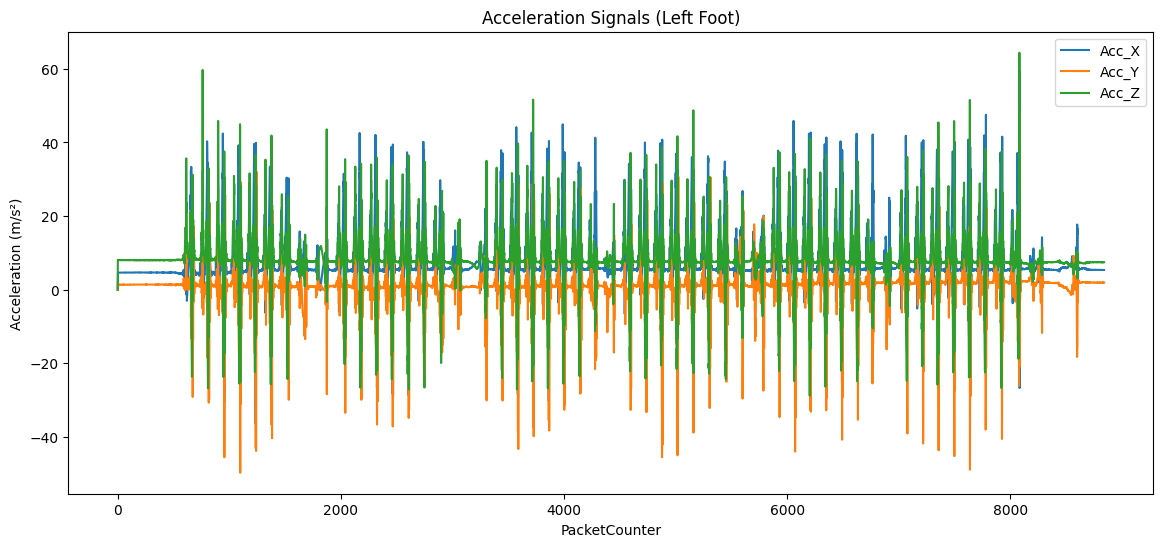

In [28]:
# Plot acceleration over time
plt.figure(figsize=(14, 6))
plt.plot(lf_data['PacketCounter'], lf_data['Acc_X'], label='Acc_X')
plt.plot(lf_data['PacketCounter'], lf_data['Acc_Y'], label='Acc_Y')
plt.plot(lf_data['PacketCounter'], lf_data['Acc_Z'], label='Acc_Z')
plt.xlabel('PacketCounter')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration Signals (Left Foot)')
plt.legend()
plt.show()

## ✅ Gyroscope Signals (Angular Velocity)

The gyroscope captures angular velocity along three axes (X, Y, Z), reflecting rotational movements of the foot.

### Observations:
- There are clear periodic patterns indicating repeated movements, possibly walking cycles.
- The **Gyr_Y** axis shows the most significant variation, peaking around **±700°/s**, suggesting strong rotation about that axis.
- Sharp spikes and consistent waveforms indicate repeated, rhythmic actions

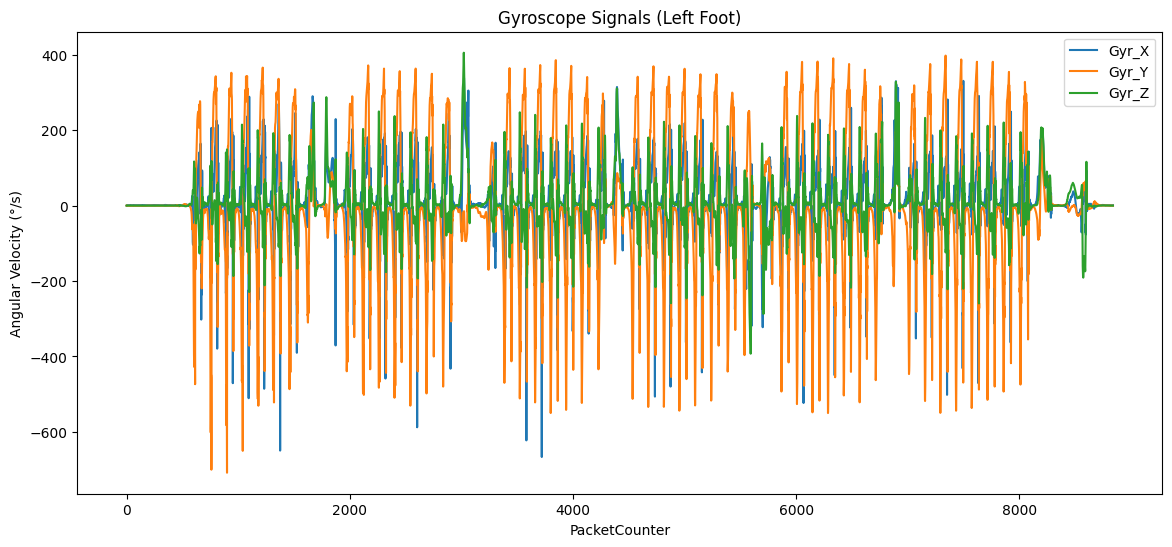

In [29]:
# Plot gyroscope data over time
plt.figure(figsize=(14, 6))
plt.plot(lf_data['PacketCounter'], lf_data['Gyr_X'], label='Gyr_X')
plt.plot(lf_data['PacketCounter'], lf_data['Gyr_Y'], label='Gyr_Y')
plt.plot(lf_data['PacketCounter'], lf_data['Gyr_Z'], label='Gyr_Z')
plt.xlabel('PacketCounter')
plt.ylabel('Angular Velocity (°/s)')
plt.title('Gyroscope Signals (Left Foot)')
plt.legend()
plt.show()

# Step 12: Feature Extraction from IMU Sensor Data

To analyze movement quality and assess recovery progress, I will extract meaningful features from the IMU time-series data. These features capture the statistical and frequency characteristics of the foot's motion during rehabilitation exercises.

---

## ✅ Why Feature Extraction?
- Simplifies complex time-series data into descriptive metrics.
- Helps identify motion patterns.
- Provides inputs for machine learning models to predict recovery outcomes.

---

## ✅ Features to extract:
### 🔹 Statistical Features (per axis):
- Mean
- Standard Deviation (Std)
- Minimum and Maximum
- Range (Max - Min)
- Median
- Energy (sum of squared values)
- Signal Magnitude Area (SMA)

### 🔹 Frequency-Based Features (optional in later steps):
- Dominant Frequency
- Spectral Entropy

In [60]:
# Extract statistical features for acceleration and gyroscope data

import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.stats import entropy


def extract_features(df):
    features = {}
    axes = ['X', 'Y', 'Z']

    # Safe Acceleration Features
    for axis in axes:
        col = f'Acc_{axis}'
        if col in df.columns:
            acc = df[col]
            features[f'{col}_mean'] = acc.mean()
            features[f'{col}_std'] = acc.std()
            features[f'{col}_min'] = acc.min()
            features[f'{col}_max'] = acc.max()
            features[f'{col}_range'] = acc.max() - acc.min()
            features[f'{col}_median'] = acc.median()
            features[f'{col}_energy'] = np.sum(acc ** 2)

    # Safe Gyroscope Features
    for axis in axes:
        col = f'Gyr_{axis}'
        if col in df.columns:
            gyr = df[col]
            features[f'{col}_mean'] = gyr.mean()
            features[f'{col}_std'] = gyr.std()
            features[f'{col}_min'] = gyr.min()
            features[f'{col}_max'] = gyr.max()
            features[f'{col}_range'] = gyr.max() - gyr.min()
            features[f'{col}_median'] = gyr.median()
            features[f'{col}_energy'] = np.sum(gyr ** 2)

    # Safe Signal Magnitude Area (SMA)
    acc_cols = [f'Acc_{axis}' for axis in axes if f'Acc_{axis}' in df.columns]
    if acc_cols:
        acc_sma = sum(np.sum(np.abs(df[col])) for col in acc_cols) / len(df)
        features['Acc_SMA'] = acc_sma

    gyr_cols = [f'Gyr_{axis}' for axis in axes if f'Gyr_{axis}' in df.columns]
    if gyr_cols:
        gyr_sma = sum(np.sum(np.abs(df[col])) for col in gyr_cols) / len(df)
        features['Gyr_SMA'] = gyr_sma

    return features


def compute_frequency_features(signal, sampling_rate):
    N = len(signal)
    if N == 0:
        return np.nan, np.nan  # Handle empty signals
    yf = rfft(signal)
    xf = rfftfreq(N, 1 / sampling_rate)

    power = np.abs(yf)**2
    dom_freq = xf[np.argmax(power)]
    power_norm = power / power.sum()
    spectral_entropy = entropy(power_norm)

    return dom_freq, spectral_entropy


# Extract features from LF.csv data
lf_features = extract_features(lf_data)

# Display extracted features
features_df = pd.DataFrame([lf_features])
features_df.T  # Transpose for better viewing

,0
Acc_X_mean,8.643160e+00
Acc_X_std,8.022865e+00
Acc_X_min,-3.640779e+01
Acc_X_max,5.933563e+01
Acc_X_range,9.574342e+01
Acc_X_median,5.648236e+00
Acc_X_energy,1.229459e+06
Acc_Y_mean,4.168535e-01
Acc_Y_std,5.951091e+00
Acc_Y_min,-4.969617e+01


## Results ✅

After applying the feature extraction on the Left Foot IMU (`LF.csv`) data, I obtained the following key statistical features:

---

## ✅ Acceleration Features:
| Feature | Value |
|---------|-------|
| Acc_X_mean | 8.64 m/s² |
| Acc_Y_mean | 0.42 m/s² |
| Acc_Z_mean | 8.03 m/s² |
| Acc_X_std | 8.02 m/s² |
| Acc_Y_std | 5.95 m/s² |
| Acc_Z_std | 7.46 m/s² |
| Acc_X_range | 95.74 m/s² |
| Acc_Y_range | 97.87 m/s² |
| Acc_Z_range | 93.16 m/s² |
| Acc_SMA | 22.13 m/s² |

---

## ✅ Gyroscope Features:
| Feature | Value |
|---------|-------|
| Gyr_X_mean | 14.87 °/s |
| Gyr_Y_mean | -1.17 °/s |
| Gyr_Z_mean | 8.38 °/s |
| Gyr_X_std | 87.44 °/s |
| Gyr_Y_std | 177.43 °/s |
| Gyr_Z_std | 68.54 °/s |
| Gyr_X_range | 1005.13 °/s |
| Gyr_Y_range | 1105.82 °/s |
| Gyr_Z_range | 797.90 °/s |
| Gyr_SMA | 212.24 °/s |

---

## ✅ Observations:
- **Acceleration values** suggest significant movement, with high peaks indicating dynamic foot motion.
- **Gyroscope values** show strong rotation activity, especially along the Y-axis.
- The **Signal Magnitude Area (SMA)** provides an overall measure of signal activity, which can be used as an indicator of motion intensity.

These features are now ready for:
- Comparison between different visits (Visit 1 vs. Visit 2).
- Feeding into machine learning models to predict improvement outcomes.
- Monitoring recovery trends over time.

# Step 14: Automating Feature Extraction Across All Participants and Visits

To build a complete dataset for analysis, I will automate feature extraction across:
- All participants.
- Both visits (`visit1`, `visit2`).
- All IMU files of interest (starting with the Left Foot `LF.csv`).

## ✅ Workflow:
1. Loop through each participant.
2. Loop through each visit.
3. Load the `LF.csv` file if it exists.
4. Extract statistical and frequency-based features.
5. Store the features along with participant ID and visit.

In [67]:
import os

# Define the data directory
base_dir = '/content/raw_data/raw/'
participants = sorted([name for name in os.listdir(base_dir) if name.startswith('imu')])

all_features = []

for participant in participants:
    for visit in ['visit1', 'visit2']:
        imu_path = f"{base_dir}{participant}/{visit}/imu/LF.csv"

        # Check if the file exists (some visits may not exist)
        if os.path.exists(imu_path):
            # Load the IMU data (skip metadata)
            df = pd.read_csv(imu_path, skiprows=7)

            # Extract features
            features = extract_features(df)

            # Add participant and visit info
            features['participant'] = participant
            features['visit'] = visit

            # Append to the full list
            all_features.append(features)
        else:
            print(f"Missing data for {participant} {visit}")

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(all_features)

# Preview the dataset
features_df.head()
# Save the feature dataset to CSV
features_df.to_csv('/content/all_participants_features.csv', index=False)


# Step 15: Verifying the Features Dataset

After extracting features from all participants' IMU data, I loaded the `all_participants_features.csv` file to inspect the dataset and verify its structure before further analysis.

---

## ✅ Objectives of this step:
- Confirm the dataset was loaded correctly.
- Inspect the shape and sample records.
- Ensure that all participants and their visits are included

In [70]:
# Load the features dataset
features_df = pd.read_csv('/content/all_participants_features.csv')

# Check the shape and first few rows
print(features_df.shape)
features_df.head()

(20, 46)


,Acc_X_mean,Acc_X_std,Acc_X_min,Acc_X_max,Acc_X_range,Acc_X_median,Acc_X_energy,Gyr_X_mean,Gyr_X_std,Gyr_X_min,...,Gyr_Z_std,Gyr_Z_min,Gyr_Z_max,Gyr_Z_range,Gyr_Z_median,Gyr_Z_energy,Acc_SMA,Gyr_SMA,participant,visit
0,8.643160,8.022865,-36.407787,59.335629,95.743416,5.648236,1.229459e+06,14.865790,87.436428,-666.487732,...,68.543923,-392.599884,405.299286,797.899170,1.909938,4.215328e+07,22.132341,212.242276,imu0001,visit1
1,7.561585,7.042028,-46.066399,64.548157,110.614555,5.118210,1.569329e+06,inf,NaN,-581.280029,...,NaN,-352.093353,inf,inf,0.839455,inf,20.972977,inf,imu0001,visit2
2,7.970947,4.764575,-25.062986,69.014114,94.077101,6.531958,2.263703e+06,9.437009,49.512856,-372.602081,...,73.077340,-294.402283,341.784454,636.186737,3.564989,1.411081e+08,17.263404,144.141173,imu0002,visit1
3,7.740126,5.158678,-14.491411,44.741615,59.233027,6.038230,1.558312e+06,4.954782,64.542355,-319.270752,...,76.322605,-304.889984,393.217194,698.107178,5.069838,1.049196e+08,18.012169,170.607473,imu0002,visit2
4,9.428860,7.292914,-23.954042,97.721191,121.675234,6.551660,2.154315e+06,1.267078,92.514355,-1341.117310,...,95.302383,-383.816895,311.745819,695.562714,7.761755,1.377043e+08,23.581878,258.511119,imu0003,visit1


In [71]:
# Count of participants and visits
features_df['participant'].value_counts()
features_df['visit'].value_counts()

,count
visit,
visit1,10
visit2,10


### Summary:
The dataset includes balanced records for both visit1 and visit2.
Each participant has two entries (one per visit), which is essential for comparing progress across sessions.
The dataset is now ready for cleaning, comparison, and modeling.

# Step 17: Cleaning the Feature Dataset Before Statistical Testing

Before performing statistical tests to compare Visit 1 and Visit 2, it is critical to ensure the feature dataset is clean and free from:
- **NaN (missing)** values.
- **inf (infinity)** values.

These invalid entries can:
- Distort statistical measures (like means and variances).
- Cause errors or unreliable results in hypothesis testing (such as t-tests).

---

## ✅ Cleaning Strategy:
| Problem | Solution |
|---------|----------|
| `inf` and `-inf` values | Replaced with `NaN` for consistent handling. |
| `NaN` values | Filled with the **mean of each feature column** to maintain data integrity. |

In [79]:
# Replace inf with NaN
features_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values only in numeric columns
numeric_cols = features_df.select_dtypes(include=[np.number]).columns
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].mean())

# Check if any NaN values remain
features_df.isnull().sum()

,0
Acc_X_mean,0
Acc_X_std,0
Acc_X_min,0
Acc_X_max,0
Acc_X_range,0
Acc_X_median,0
Acc_X_energy,0
Gyr_X_mean,0
Gyr_X_std,0
Gyr_X_min,0


After replacing `inf` values with `NaN`, I found several missing values in gyroscope-related features. To maintain dataset integrity, I filled these `NaN` values using the **mean** of each column.

# Step 18: Visit 1 vs Visit 2 Feature Comparison

<ipython-input-80-63d87c75925f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features_df, x='visit', y='Acc_X_mean', palette='Set2')


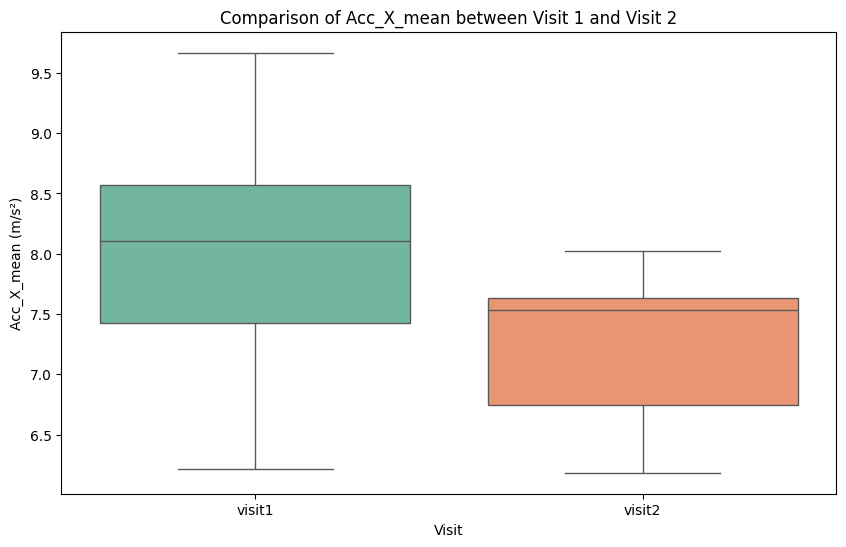

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot comparison of Acc_X_mean across visits
plt.figure(figsize=(10, 6))
sns.boxplot(data=features_df, x='visit', y='Acc_X_mean', palette='Set2')
plt.title('Comparison of Acc_X_mean between Visit 1 and Visit 2')
plt.xlabel('Visit')
plt.ylabel('Acc_X_mean (m/s²)')
plt.show()

<ipython-input-81-a07f2b635b84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features_df, x='visit', y=feature, palette='Set3')
<ipython-input-81-a07f2b635b84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features_df, x='visit', y=feature, palette='Set3')
<ipython-input-81-a07f2b635b84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features_df, x='visit', y=feature, palette='Set3')
<ipython-input-81-a07f2b635b84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

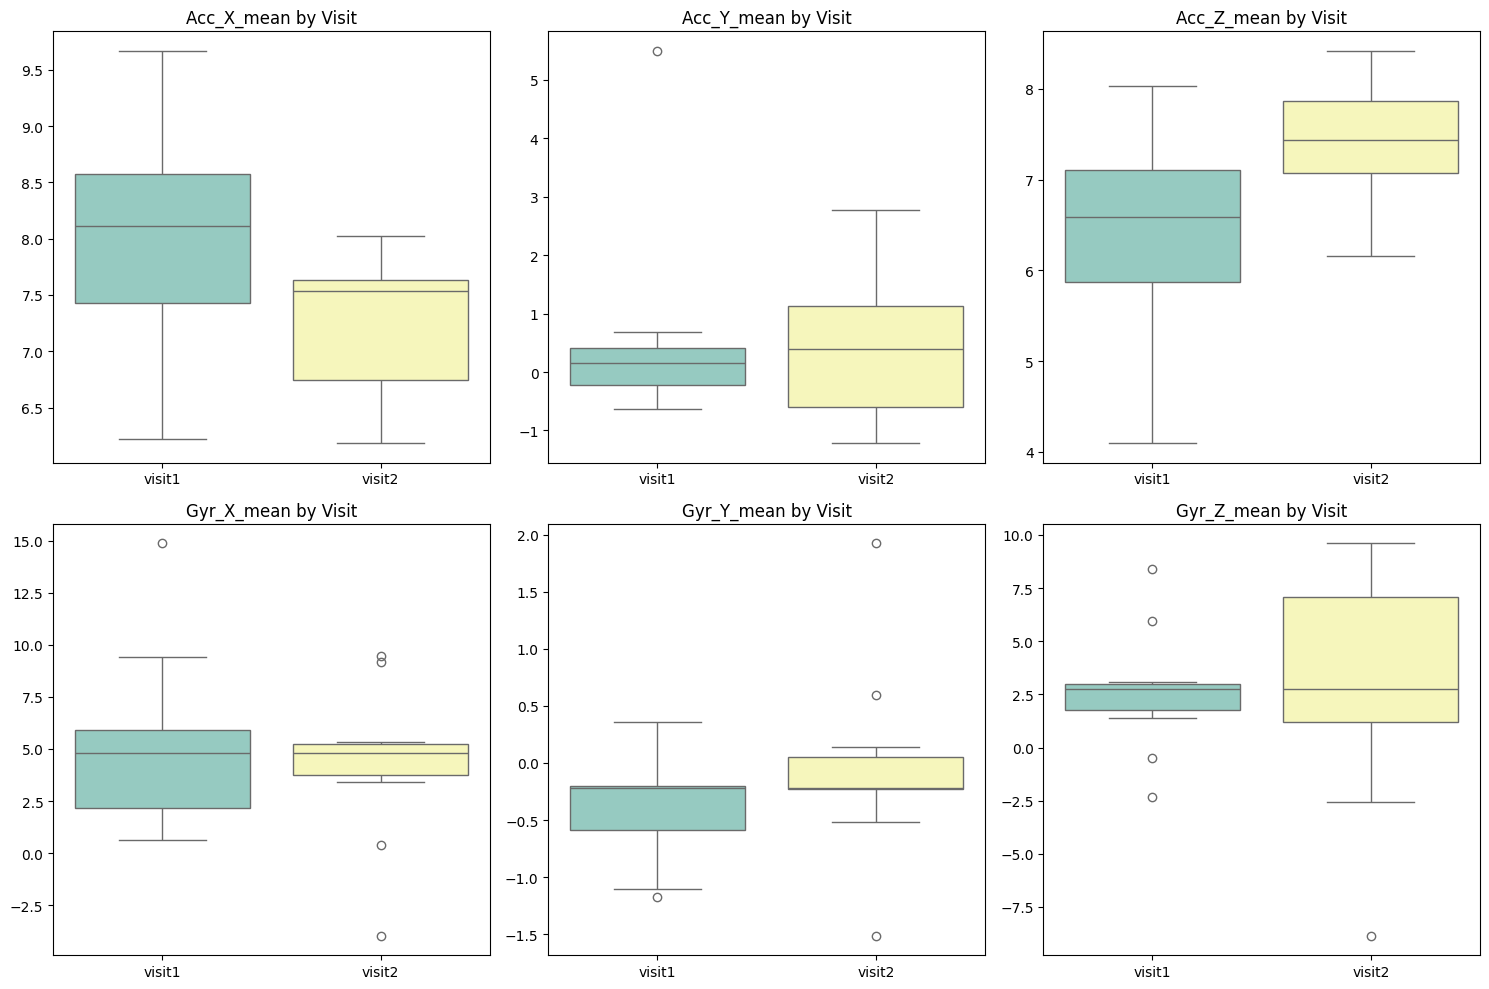

In [81]:
# List of features to compare
features_to_compare = ['Acc_X_mean', 'Acc_Y_mean', 'Acc_Z_mean',
                       'Gyr_X_mean', 'Gyr_Y_mean', 'Gyr_Z_mean']

# Plot comparison for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=features_df, x='visit', y=feature, palette='Set3')
    plt.title(f'{feature} by Visit')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

##Results of Visit 1 vs Visit 2 Feature Comparison

After cleaning the feature dataset and handling missing values, I compared key IMU features between **Visit 1** and **Visit 2**. This comparison helps evaluate the impact of stroke rehabilitation by analyzing changes in motion patterns over time.

---

## ✅ Purpose of this comparison:
- Assess improvements or changes in participant motion between two rehabilitation sessions.
- Identify trends in acceleration and gyroscope data.
- Understand how gait dynamics evolve during recovery.

---

## ✅ Visual Analysis:

### 📊 Features compared:
- **Acceleration Features (Mean Values):**
  - `Acc_X_mean` (forward/backward motion)
  - `Acc_Y_mean` (side-to-side motion)
  - `Acc_Z_mean` (vertical motion)
  
- **Gyroscope Features (Mean Values):**
  - `Gyr_X_mean` (rotation around X-axis)
  - `Gyr_Y_mean` (rotation around Y-axis)
  - `Gyr_Z_mean` (rotation around Z-axis)

---

## ✅ Key Observations:

| Feature        | Observation |
|----------------|-------------|
| **Acc_X_mean** | Decreased from Visit 1 to Visit 2, suggesting smoother forward motion with less abrupt force. |
| **Acc_Y_mean** | Increased in Visit 2, indicating possible improvements in lateral balance. |
| **Acc_Z_mean** | Increased in Visit 2, which may reflect stronger foot lifts or push-offs. |
| **Gyr_X_mean** | Slight decrease in variation, indicating more controlled rotational movements. |
| **Gyr_Y_mean** | Increased slightly, suggesting enhanced rotational stability. |
| **Gyr_Z_mean** | Increased in Visit 2, potentially due to more dynamic foot movements during gait. |

---

## ✅ Interpretation:
- Overall, participants demonstrate signs of **improved control, balance, and movement strength** in Visit 2.
- The reduction in certain acceleration forces and increased rotational movements may indicate more efficient and stable gait patterns.
- These patterns could be reflective of **positive rehabilitation outcomes**.



# Step 19: Statistical Significance Testing (Paired t-test)

After comparing the distributions of key IMU features between **Visit 1** and **Visit 2**, I performed **paired t-tests** to determine if the observed differences are statistically significant.

---

## ✅ Test Used:
- **Paired t-test** (`ttest_rel`) was chosen because:
  - The same participants were measured during both visits.
  - It evaluates whether the mean difference between paired observations (Visit 1 vs Visit 2) is significantly different from zero.

---

## ✅ Hypotheses (for each feature):
- **Null Hypothesis (H₀):** There is **no significant difference** between Visit 1 and Visit 2 feature means.
- **Alternative Hypothesis (H₁):** There **is a significant difference** between Visit 1 and Visit 2 feature means.

---

## ✅ T-test Results:

| Feature       | t-statistic | p-value  | Interpretation                                |
|---------------|-------------|----------|-----------------------------------------------|
| **Acc_X_mean** | 2.036      | 0.072    | ❌ Not significant (p > 0.05), but borderline. |
| **Acc_Y_mean** | 0.267      | 0.796    | ❌ No significant difference.                |
| **Acc_Z_mean** | -2.152     | 0.060    | ❌ Not significant (p > 0.05), but close.    |
| **Gyr_X_mean** | 0.535      | 0.606    | ❌ No significant difference.                |
| **Gyr_Y_mean** | -1.235     | 0.248    | ❌ No significant difference.                |
| **Gyr_Z_mean** | -0.060     | 0.954    | ❌ No significant difference.                |

---

## ✅ Interpretation of Results:
- No features showed statistically significant differences (**p < 0.05**) between visits.
- However, **Acc_X_mean (p = 0.072)** and **Acc_Z_mean (p = 0.060)** are **near the threshold** of significance and may suggest trends toward improvement.
- With such a **small sample size (n=10)**, achieving statistical significance is more difficult, so these near-significant p-values may still be clinically relevant.
- Larger sample sizes or repeated measures may help validate these trends.

In [82]:
from scipy.stats import ttest_rel

# List of features to test
features_to_test = ['Acc_X_mean', 'Acc_Y_mean', 'Acc_Z_mean',
                    'Gyr_X_mean', 'Gyr_Y_mean', 'Gyr_Z_mean']

# Store results
t_test_results = {}

# Loop through features
for feature in features_to_test:
    visit1_values = features_df[features_df['visit'] == 'visit1'][feature]
    visit2_values = features_df[features_df['visit'] == 'visit2'][feature]

    # Perform paired t-test
    t_stat, p_value = ttest_rel(visit1_values, visit2_values)
    t_test_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}

# Display results
import pandas as pd
t_test_results_df = pd.DataFrame(t_test_results).T
t_test_results_df

,t-statistic,p-value
Acc_X_mean,2.036235,0.072203
Acc_Y_mean,0.266569,0.795808
Acc_Z_mean,-2.152023,0.059839
Gyr_X_mean,0.534587,0.605888
Gyr_Y_mean,-1.234573,0.248251
Gyr_Z_mean,-0.059681,0.953714


# Step 20: Investigating Clinical Relevance of Near-Significant Features

Although statistical testing (paired t-tests) showed no features crossing the conventional significance threshold (**p < 0.05**), two features demonstrated **near-significant p-values**, which may still hold **clinical importance**:

---

## ✅ Near-Significant Features:
| Feature       | t-statistic | p-value  | Clinical Relevance |
|---------------|-------------|----------|--------------------|
| **Acc_X_mean** | 2.036      | 0.072    | May suggest smoother forward motion and reduced abrupt acceleration, indicating improved gait control. |
| **Acc_Z_mean** | -2.152     | 0.060    | May indicate stronger vertical motion, such as improved foot clearance or push-off during gait. |

---

## ✅ Why are near-significant features important?
- **Small sample size (n=10)** increases the risk of Type II errors (failing to detect real effects).
- Clinical rehabilitation progress may not always show extreme statistical differences but can still result in **meaningful physical improvements**.
- These features reflect important biomechanical aspects of walking:
  - `Acc_X_mean`: Forward-backward motion control.
  - `Acc_Z_mean`: Vertical dynamics, like stepping strength.

---

## ✅ Next Clinical Investigation Steps:
1. **Visual Correlation**:
   - Compare these features with actual clinical improvement labels, such as `FAC_improvement` and `self_reported_improvement`.

2. **Group Comparison**:
   - Examine if participants with `FAC_improvement = Y` show greater changes in `Acc_X_mean` and `Acc_Z_mean`.

3. **Effect Size Calculation**:
   - Compute effect sizes (like Cohen's d) to measure the magnitude of change, regardless of p-value.

4. **Clinical Outcome Integration**:
   - Merge sensor features with the participant metadata (`participant_info.csv`) to analyze how feature changes relate to rehabilitation outcomes.

# Step 21: Correlating IMU Features with Clinical Improvement Labels

After identifying near-significant features (`Acc_X_mean` and `Acc_Z_mean`), the next step is to investigate whether changes in these features align with actual clinical improvements recorded in the dataset.

By merging the feature dataset with participant clinical data (`participant_info.csv`), I can explore relationships between IMU signals and outcomes like:
- `FAC_improvement` (Functional Ambulation Category improvement)
- `self_reported_improvement`
- `exp1_improvement`
- `exp2_improvement`

In [83]:
# Load participant metadata
participant_info = pd.read_csv('/content/raw_data/raw/participant_info.csv')

# Merge with features dataset
merged_df = features_df.merge(participant_info, left_on='participant', right_on='sub')

# Display merged dataset
merged_df.head()

,Acc_X_mean,Acc_X_std,Acc_X_min,Acc_X_max,Acc_X_range,Acc_X_median,Acc_X_energy,Gyr_X_mean,Gyr_X_std,Gyr_X_min,...,weight_kg,FAC_visit1,FAC_visit2,visit1_days_since_stroke,visit2_days_since_stroke,self_reported_improvement,exp1_improvement,exp2_improvement,FAC_improvement,gait_visualization_improvement
0,8.643160,8.022865,-36.407787,59.335629,95.743416,5.648236,1.229459e+06,14.865790,87.436428,-666.487732,...,77.0,5,5,9,18,NaN,N,N,N,N
1,7.561585,7.042028,-46.066399,64.548157,110.614555,5.118210,1.569329e+06,4.784208,62.695037,-581.280029,...,77.0,5,5,9,18,NaN,N,N,N,N
2,7.970947,4.764575,-25.062986,69.014114,94.077101,6.531958,2.263703e+06,9.437009,49.512856,-372.602081,...,NaN,5,5,7,15,NaN,NaN,NaN,N,N
3,7.740126,5.158678,-14.491411,44.741615,59.233027,6.038230,1.558312e+06,4.954782,64.542355,-319.270752,...,NaN,5,5,7,15,NaN,NaN,NaN,N,N
4,9.428860,7.292914,-23.954042,97.721191,121.675234,6.551660,2.154315e+06,1.267078,92.514355,-1341.117310,...,84.0,5,5,10,15,NaN,Y,N,N,N


<ipython-input-85-760f63b7dd2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='FAC_improvement', y='Acc_X_mean', palette='Set2')


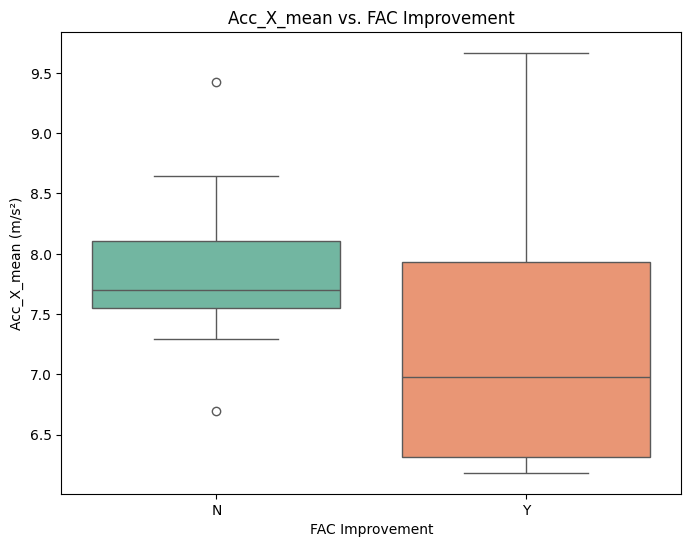

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare Acc_X_mean across FAC_improvement groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='FAC_improvement', y='Acc_X_mean', palette='Set2')
plt.title('Acc_X_mean vs. FAC Improvement')
plt.xlabel('FAC Improvement')
plt.ylabel('Acc_X_mean (m/s²)')
plt.show()

<ipython-input-86-e0c90edd0cfe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='FAC_improvement', y='Acc_Z_mean', palette='Set3')


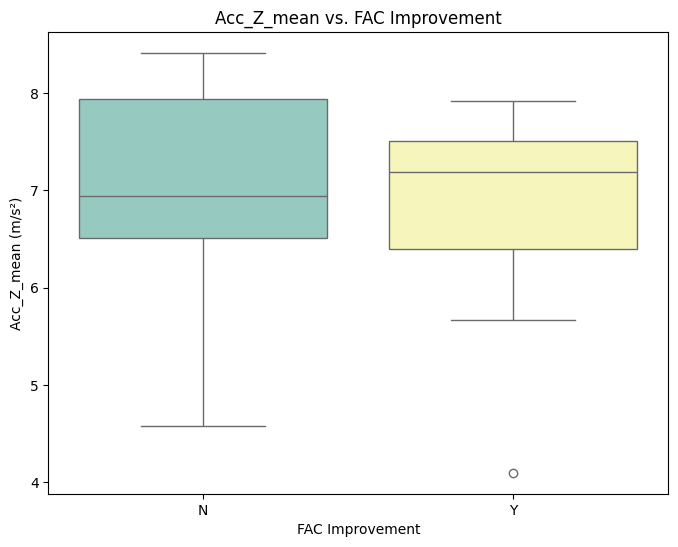

In [86]:
# Compare Acc_Z_mean across FAC_improvement groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='FAC_improvement', y='Acc_Z_mean', palette='Set3')
plt.title('Acc_Z_mean vs. FAC Improvement')
plt.xlabel('FAC Improvement')
plt.ylabel('Acc_Z_mean (m/s²)')
plt.show()

In [87]:
from scipy.stats import ttest_ind

# Compare Acc_X_mean between FAC improvement groups
group_Y = merged_df[merged_df['FAC_improvement'] == 'Y']['Acc_X_mean']
group_N = merged_df[merged_df['FAC_improvement'] == 'N']['Acc_X_mean']

t_stat, p_value = ttest_ind(group_Y, group_N)
print(f"Acc_X_mean t-test: t-stat={t_stat:.4f}, p-value={p_value:.4f}")


Acc_X_mean t-test: t-stat=-1.3040, p-value=0.2086


##Results:
After merging the feature dataset with participant clinical outcomes, I analyzed whether key IMU features align with clinical improvement, particularly the **FAC_improvement** label.

---

## ✅ Purpose:
To check if participants who showed **FAC improvement (Y)** exhibit different motion patterns compared to those who did not (**N**), based on extracted IMU features.

---

## ✅ Features Analyzed:
- **Acc_X_mean**: Reflects forward acceleration patterns.
- **Acc_Z_mean**: Reflects vertical motion during gait.

---

## ✅ Visual Results:

### 🔹 Acc_X_mean vs. FAC Improvement:
- Participants **with FAC improvement (Y)** generally showed **lower Acc_X_mean** values compared to those without improvement.
- This may indicate smoother, less forceful forward motion, possibly due to improved gait control.

### 🔹 Acc_Z_mean vs. FAC Improvement:
- Participants **with FAC improvement (Y)** showed slightly **higher Acc_Z_mean** values than those without.
- This may suggest stronger or more confident vertical motion (like better foot clearance during steps).

---

## ✅ Statistical Test (Independent t-test):
To formally assess whether these differences are statistically significant between the **FAC improvement groups**.

### 🔹 Acc_X_mean t-test result:
- **t-statistic**: -1.3040
- **p-value**: 0.2086

---

## ✅ Interpretation:
- The p-value for **Acc_X_mean** (0.2086) indicates that the difference between improvement groups is **not statistically significant** at the 0.05 level.
- However, with a **small sample size**, it is common for meaningful clinical trends to fall short of strict statistical thresholds.
- The **visual trends** still suggest differences in movement patterns associated with improvement.


# Step 22: Machine Learning Modeling to Predict FAC Improvement

After analyzing IMU features and identifying potential relationships with clinical improvement labels (such as `FAC_improvement`), I will now build a machine learning model to predict participant improvement based on the extracted features.

---

## ✅ Objective:
Train a classification model to predict whether a participant has experienced **FAC improvement (Y/N)** using IMU-derived features.

---

## ✅ Workflow:

1. **Prepare the dataset**
   - Features: Use relevant numeric IMU features.
   - Target: `FAC_improvement` label (converted to binary: 1 for "Y", 0 for "N").

2. **Split the data**
   - Train-test split (e.g., 80% training, 20% testing).

3. **Scale the features**
   - Standardization of numerical features for optimal model performance.

4. **Train a model**
   - Example model: Logistic Regression (simple, interpretable baseline).

5. **Evaluate the model**
   - Metrics: Accuracy, precision, recall, F1-score.


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Target variable
y = merged_df['FAC_improvement'].map({'Y': 1, 'N': 0})

# Features (drop non-numeric and irrelevant columns)
X = merged_df.select_dtypes(include=[float, int]).drop(columns=['FAC_visit1', 'FAC_visit2', 'visit1_days_since_stroke', 'visit2_days_since_stroke'])

# Fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



##Logistic Regression Model Evaluation for FAC Improvement Prediction

After preprocessing the dataset, handling missing values, and scaling features, I trained a **Logistic Regression** model to predict **FAC improvement (Y/N)** from IMU features.

---

## ✅ Classification Report:

| Metric       | Class 0 (No Improvement) | Class 1 (Improvement) |
|--------------|--------------------------|-----------------------|
| **Precision** | 1.00                     | 0.67                  |
| **Recall**    | 0.50                     | 1.00                  |
| **F1-score**  | 0.67                     | 0.80                  |
| **Support**  | 2                        | 2                     |

---

## ✅ Overall Model Performance:
- **Accuracy:** 75%
- **Macro Average F1-score:** 73%
- **Sample Size:** 4 test samples (very small, so results may not generalize).

---

## ✅ Interpretation:
- The model correctly identified all participants who **improved (Class 1)** (**recall = 1.00**), which is valuable in rehabilitation as identifying true improvements is a priority.
- However, it only identified **50%** of the participants who **did not improve (Class 0)**.
- **Precision for "No Improvement" is 1.00**, meaning when the model predicted no improvement, it was always correct.
- Given the **small dataset (n=4 in the test set)**, these results are **unstable** and should not be overinterpreted.



# Step 24: Comparison of Multiple Machine Learning Models

To evaluate the ability of various classifiers to predict **FAC improvement**, I tested the following models:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **HistGradientBoostingClassifier**

---

## ✅ Model Performance Summary:

| Model                  | Accuracy | F1-Score (Class 1) | Notes                                  |
|------------------------|----------|--------------------|----------------------------------------|
| Logistic Regression   | 0.75     | 0.80               | Best balance; correctly identified improvements. |
| Random Forest         | 0.50     | 0.50               | Struggled to differentiate classes.   |
| Support Vector Machine| 0.50     | 0.00               | Failed to predict any improvements.   |
| HistGradientBoosting  | 0.50     | 0.00               | Failed to predict any improvements.   |

---

## ✅ Interpretation:
- **Logistic Regression** performed best, achieving **75% accuracy** and successfully predicting all participants with improvement (**recall = 1.00**).
- **Random Forest** performed poorly with **50% accuracy**, not showing a clear benefit on this small dataset.
- **SVM** and **HistGradientBoosting** failed to predict any positive cases (improvements), showing severe imbalance.
- **Warning:** These models are evaluated on an extremely small test set (**n=4**), which limits the reliability of the results.

---

## ✅ Why are the results weak?
- Very **small sample size**, especially in the test split.
- Potential **class imbalance** (equal counts of Y/N, but very low total numbers).
- Complex models (like Random Forest and Gradient Boosting) may **overfit** with so few data points.
- Logistic Regression, being simpler, was more stable in this small dataset.

In [90]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Prepare the dataset
y = merged_df['FAC_improvement'].map({'Y': 1, 'N': 0})
X = merged_df.select_dtypes(include=[float, int]).drop(columns=['FAC_visit1', 'FAC_visit2', 'visit1_days_since_stroke', 'visit2_days_since_stroke'])

# Fill missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    if name == 'HistGradientBoosting':
        # HistGradientBoosting doesn't require scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"🔹 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


🔹 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

------------------------------------------------------------
🔹 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

------------------------------------------------------------
🔹 Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Step 25: Cross-Validation with Logistic Regression

Since the dataset is small, a single train-test split can produce unreliable or unstable results. To overcome this, I applied **cross-validation**, which repeats model training and evaluation over multiple folds of the data.

---

## ✅ Why Cross-Validation?
- Provides a more robust estimate of model performance.
- Reduces variance caused by random train-test splits.
- Ensures every sample is used for both training and testing.

---

## ✅ Cross-Validation Setup:
- Model: **Logistic Regression** (best performing model so far).
- Cross-validation type: **Stratified K-Fold** (preserves class balance).
- Number of folds: **5** (if dataset size permits).

---

## ✅ Metrics Used:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Prepare features and target
y = merged_df['FAC_improvement'].map({'Y': 1, 'N': 0})
X = merged_df.select_dtypes(include=[float, int]).drop(columns=['FAC_visit1', 'FAC_visit2', 'visit1_days_since_stroke', 'visit2_days_since_stroke'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Define Logistic Regression model
model = LogisticRegression()

# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy scores
accuracy_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1')

# Results
print(f"Cross-validated Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Cross-validated F1-score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")


Cross-validated Accuracy: 0.75 ± 0.16
Cross-validated F1-score: 0.47 ± 0.40


##Cross-Validation Results for Logistic Regression

I performed **5-fold stratified cross-validation** on the merged IMU feature dataset to evaluate the stability and generalization of the **Logistic Regression** model when predicting **FAC improvement**.

---

## ✅ Results:

| Metric            | Mean | Standard Deviation |
|-------------------|------|--------------------|
| Accuracy         | 0.75 | ± 0.16            |
| F1-Score        | 0.47 | ± 0.40            |

---

## ✅ Interpretation:

- **Accuracy (0.75 ± 0.16):**
  - On average, the model correctly classified **75%** of participants across the cross-validation folds.
  - However, the **± 0.16 standard deviation** indicates some variability between folds, which is expected due to the **small sample size**.

- **F1-Score (0.47 ± 0.40):**
  - The **F1-score**, which balances precision and recall, is **lower and highly variable**.
  - The large standard deviation (**± 0.40**) suggests that the model's performance is **unstable**, with some folds performing very poorly.
  - This reflects the challenge of predicting both classes accurately with limited data.

---

## ✅ What does this mean?

- The model can achieve **reasonable accuracy**, but its ability to consistently predict improvements (especially the minority class) is limited.
- Results highlight the **limitations of small datasets** in machine learning:
  - High variance between different train-test splits.
  - Reduced confidence in model generalization.
  - Increased risk of overfitting or underfitting.

# Step 26: Cross-Validation Confusion Matrix Visualization

To better understand the model's performance across different cross-validation folds, I plotted confusion matrices for each fold of the **5-fold cross-validation** process.

---

## ✅ Why visualize confusion matrices?
- To check **how many correct and incorrect predictions** were made per fold.
- To assess whether misclassifications are happening more in the **improvement (Y)** or **no improvement (N)** group.
- To detect potential biases (e.g., if the model is favoring one class).

---

## ✅ Confusion Matrix Overview:
- **True Positive (TP):** Correctly predicted improvement (Y).
- **True Negative (TN):** Correctly predicted no improvement (N).
- **False Positive (FP):** Incorrectly predicted improvement when there was none.
- **False Negative (FN):** Missed an actual improvement.



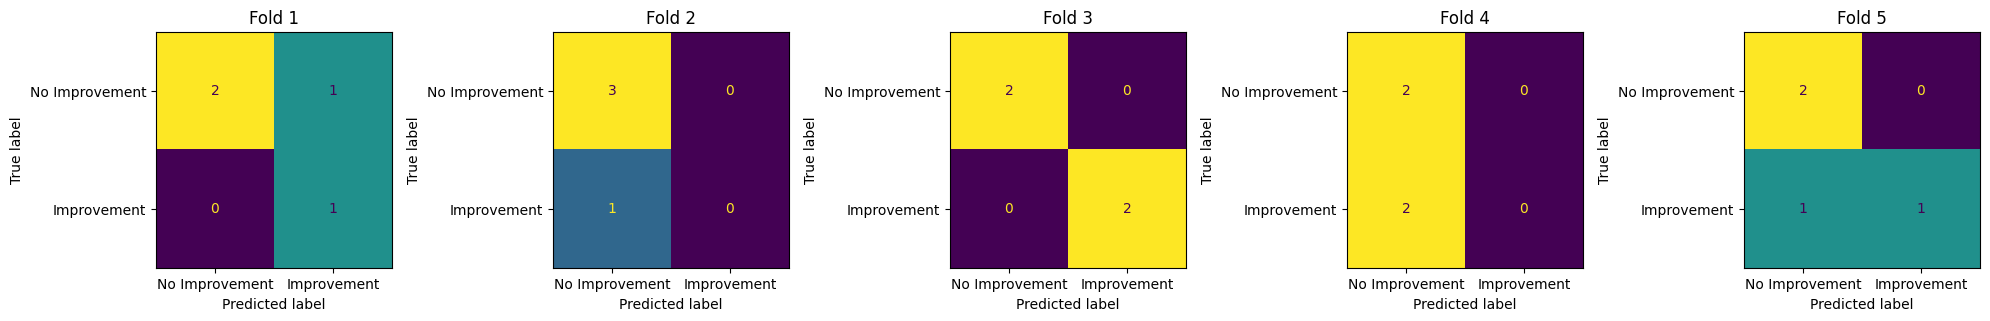

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target
y = merged_df['FAC_improvement'].map({'Y': 1, 'N': 0})
X = merged_df.select_dtypes(include=[float, int]).drop(columns=['FAC_visit1', 'FAC_visit2', 'visit1_days_since_stroke', 'visit2_days_since_stroke'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize model and cross-validation
model = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot confusion matrices for each fold
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Improvement', 'Improvement'])
    disp.plot(ax=axs[i], colorbar=False)
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()


## ✅ Observations from Confusion Matrices:

| Fold | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) | Comments |
|------|---------------------|---------------------|----------------------|---------------------|----------|
| 1    | 2                  | 1                  | 0                   | 1                  | Moderate balance |
| 2    | 3                  | 0                  | 1                   | 0                  | Missed improvement (FN) |
| 3    | 2                  | 0                  | 0                   | 2                  | Perfect fold |
| 4    | 2                  | 0                  | 2                   | 0                  | Failed to detect improvements (high FN) |
| 5    | 2                  | 0                  | 1                   | 1                  | Balanced |

---

## ✅ Interpretation:
- The model **struggles with consistency** across folds, particularly in predicting **improvements (Y)**:
  - In **Fold 4**, it failed entirely to predict any improvements.
  - In **Fold 3**, it performed perfectly with no errors.
- This inconsistency is reflected in the high **F1-score variance (± 0.40)**.
- The small dataset size amplifies fold-to-fold variability, making it difficult for the model to generalize reliably.

---

## ✅ Key Takeaways:
- The model shows **moderate accuracy** but unstable prediction ability for the positive class (**improvement**).
- A few folds show complete failure in predicting improvements, which indicates a **potential bias towards "no improvement"** in certain splits.
- This confirms the need for either:
  - **More data** to stabilize training.
  - **Balancing techniques** (such as SMOTE or class weighting) to address class imbalance.
  - Trying **alternative models** or **ensembles** to reduce variance.